In [1]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
paragraf = '''
Kita membutuhkan chatbot kesehatan mental.
Dia juga menyenangkan untuk diajak bicara.
Chatbot tidak akan pernah menggantikan terapi atau terapis.
'''

In [3]:
kalimat = nltk.sent_tokenize(paragraf)
tabel_kata = []
kalimat

['\nKita membutuhkan chatbot kesehatan mental.',
 'Dia juga menyenangkan untuk diajak bicara.',
 'Chatbot tidak akan pernah menggantikan terapi atau terapis.']

In [4]:
for i in range(len(kalimat)):
    kata = re.sub('[^a-zA-Z]', ' ', kalimat[i])
    kata = kata.lower()
    kata = kata.split()
    kata = ' '.join(kata)
    tabel_kata.append(kata)

In [5]:
tabel_kata

['kita membutuhkan chatbot kesehatan mental',
 'dia juga menyenangkan untuk diajak bicara',
 'chatbot tidak akan pernah menggantikan terapi atau terapis']

In [6]:
cv = CountVectorizer()
X = cv.fit_transform(tabel_kata).toarray()
X

array([[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]],
      dtype=int64)

In [7]:
index = ['Kalimat 1','Kalimat 2','Kalimat 3']

In [8]:
kata_kata = cv.get_feature_names()
bow = pd.DataFrame(X, columns=kata_kata, index=index)
bow

,akan,atau,bicara,chatbot,dia,diajak,juga,kesehatan,kita,membutuhkan,menggantikan,mental,menyenangkan,pernah,terapi,terapis,tidak,untuk
Kalimat 1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0
Kalimat 2,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1
Kalimat 3,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0


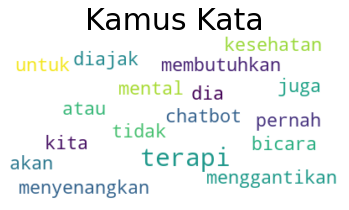

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

# Start with one review:
text = str(kata_kata).replace("'","")

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=100, background_color="white", prefer_horizontal=1).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Kamus Kata", fontsize=30)
plt.axis("off")
plt.show()

In [12]:
bow.sum()

akan            1
atau            1
bicara          1
chatbot         2
dia             1
diajak          1
juga            1
kesehatan       1
kita            1
membutuhkan     1
menggantikan    1
mental          1
menyenangkan    1
pernah          1
terapi          1
terapis         1
tidak           1
untuk           1
dtype: int64

In [13]:
bow.sum().sum()

19